In [ ]:
import pandas as pd

df = pd.read_csv("FAANG.csv")

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase display width
pd.set_option('display.max_colwidth', None)  # Show full column content

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop high-null columns
df = df.dropna(axis=1, thresh=len(df) - 5000)

df['beta'] = pd.to_numeric(df['beta'], errors='coerce')
df['beta_5y'] = pd.to_numeric(df['beta_5y'], errors='coerce')

# Fill Beta and Beta (5Y) with median by Ticker
df['beta'] = df.groupby('ticker')['beta'].transform(lambda x: x.fillna(x.median()))
df['beta_5y'] = df.groupby('ticker')['beta_5y'].transform(lambda x: x.fillna(x.median()))

df = df.drop(columns=['analyst_recommendation'])

# Remove duplicates
df.drop_duplicates(inplace=True)

company_to_ticker = df[['company', 'ticker']].drop_duplicates().set_index('company')['ticker'].to_dict()
df = df.drop(columns=['company'])

# Check the number of non-null values in each group
print(df.groupby('ticker')['beta'].apply(lambda x: x.isna().sum()))
print(df.groupby('ticker')['beta_5y'].apply(lambda x: x.isna().sum()))

#Beta and Beta 5Y are both important metrics in finance
#specifically in the context of assessing the risk and performance of stocks relative to the broader market

#Therefore we need to calculate Beta and Beta 5Y for Netlix

import pandas as pd
import yfinance as yf

# Define your tickers and date range
ticker = 'NFLX'
market_ticker = '^GSPC'  # Example market ticker (S&P 500)
start_date = '2020-01-01'
end_date = '2025-01-01'

# Fetch the data
df_ticker = yf.download(ticker, start=start_date, end=end_date)
df_market = yf.download(market_ticker, start=start_date, end=end_date)

# Access the 'Close' price for both the stock and the market
df_ticker_close = df_ticker['Close']
df_market_close = df_market['Close']

# Print the first few rows to confirm
print(df_ticker_close.head())
print(df_market_close.head())

# Calculate daily returns for NFLX and S&P 500
df_ticker_returns = df_ticker_close.pct_change().dropna()
df_market_returns = df_market_close.pct_change().dropna()

# Calculate the covariance matrix between stock and market returns
cov_matrix = pd.concat([df_ticker_returns, df_market_returns], axis=1).cov()

# Calculate beta (covariance of stock and market returns divided by variance of market returns)
beta = cov_matrix.iloc[0, 1] / cov_matrix.iloc[1, 1]

print(f"Beta for {ticker}: {beta}")

# Fetch data for the last 5 years (for beta_5y)
start_date_5y = '2018-01-01'
end_date = '2023-01-01'

# Fetch adjusted closing price data for stock and market (for beta_5y)
df_ticker_5y = yf.download("NFLX", start=start_date_5y, end=end_date)
df_market_5y = yf.download("^GSPC", start=start_date_5y, end=end_date)

# Print the columns to check the available data
print("NFLX columns:", df_ticker_5y.columns)
print("S&P 500 columns:", df_market_5y.columns)

# Use 'Close' instead of 'Adj Close' if 'Adj Close' is missing
df_ticker_5y_returns = df_ticker_5y['Close'].pct_change().dropna()
df_market_5y_returns = df_market_5y['Close'].pct_change().dropna()

# Proceed with the beta calculation
cov_matrix_5y = pd.concat([df_ticker_5y_returns, df_market_5y_returns], axis=1).cov()
beta_5y = cov_matrix_5y.iloc[0, 1] / cov_matrix_5y.iloc[1, 1]

print(f"5-Year Beta for NFLX: {beta_5y}")

df['beta'] = df['beta'].fillna(1.024)
df['beta_5y'] = df['beta_5y'].fillna(1.119)

df.isnull().sum()

df.to_csv(r"C:\Users\jahna\OneDrive\Desktop\Spring 2025\Machine Learning\Project\dataset\faang_cleaned.csv", index=False)
df.shape

ticker
AAPL        0
AMZN        0
GOOGL       0
META        0
NFLX     4982
Name: beta, dtype: int64
ticker
AAPL        0
AMZN        0
GOOGL       0
META        0
NFLX     4982
Name: beta_5y, dtype: int64
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker            NFLX
Date                  
2020-01-02  329.809998
2020-01-03  325.899994
2020-01-06  335.829987
2020-01-07  330.750000
2020-01-08  339.260010
Ticker            ^GSPC
Date                   
2020-01-02  3257.850098
2020-01-03  3234.850098
2020-01-06  3246.280029
2020-01-07  3237.179932
2020-01-08  3253.050049
Beta for NFLX: 1.0240431934563385
NFLX columns: MultiIndex([( 'Close', 'NFLX'),
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])
S&P 500 columns: MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
5-Year Beta for NFLX: 1.118656906963009


(23055, 27)

In [ ]:
df.describe()

,date,open,high,low,close,adj_close,volume,market_cap,pe_ratio,beta,eps,forward_pe,net_income,debt_to_equity,return_on_equity_roe,current_ratio,quarterly_revenue_growth,target_price,free_cash_flow,operating_margin,profit_margin,quick_ratio,price_to_book_ratio,enterprise_value,total_debt,beta_5y
count,23055,23055.000000,23055.000000,23055.000000,23055.000000,23055.000000,2.305500e+04,2.305500e+04,23055.000000,23055.000000,23055.00000,23055.000000,2.305500e+04,23055.000000,23055.000000,23055.000000,23055.000000,23055.000000,2.305500e+04,23055.000000,23055.000000,23055.000000,23055.000000,2.305500e+04,2.305500e+04,23055.000000
mean,2015-05-26 16:14:03.201041152,93.647661,94.863101,92.420934,93.672274,93.206572,1.384445e+08,1.910403e+12,35.912447,1.126099,10.29935,28.233587,5.923368e+10,67.796473,0.584159,1.520585,0.124180,379.499493,5.005229e+10,0.270897,0.222022,1.314403,19.221725,1.889730e+12,7.081389e+10,1.146628
min,2005-01-03 00:00:00,1.139107,1.159107,1.117857,1.130179,0.954409,1.144000e+06,3.247530e+11,23.492826,1.024000,4.18000,18.842924,7.780862e+09,9.549000,0.219330,0.953000,0.049000,200.200000,2.218148e+10,0.099150,0.073500,0.798000,6.708661,3.012360e+11,1.598133e+10,1.038000
25%,2010-09-22 12:00:00,11.728979,11.864486,11.587829,11.720929,11.366614,2.131500e+07,1.465347e+12,29.612986,1.038000,6.57000,23.738934,4.441900e+10,24.235000,0.308710,1.096000,0.101000,218.900000,3.201187e+10,0.295560,0.207010,0.840000,8.437223,1.439438e+12,2.871900e+10,1.119000
50%,2015-08-21 00:00:00,38.584999,38.983002,38.297501,38.598499,38.050781,5.576380e+07,1.996001e+12,35.789955,1.147000,6.97000,31.435830,5.143400e+10,66.756000,0.347140,1.133000,0.136000,240.780000,4.398850e+10,0.296140,0.264410,0.861000,9.359326,1.933662e+12,3.799100e+10,1.147000
75%,2020-03-20 00:00:00,134.849998,136.550003,133.449997,134.970001,134.173950,1.302896e+08,2.024576e+12,42.824500,1.216000,17.67000,32.732357,8.765700e+10,70.338000,0.353750,2.079000,0.150000,601.580000,5.919100e+10,0.323630,0.267020,1.897000,14.262457,2.036984e+12,1.013040e+11,1.216000
max,2024-10-18 00:00:00,734.900024,736.000000,722.500000,730.289978,730.289978,3.372970e+09,3.575092e+12,45.496414,1.239000,19.56000,32.743786,1.019560e+11,151.862000,1.605830,2.830000,0.221000,718.880000,8.615812e+10,0.381050,0.343390,2.688000,53.660430,3.569144e+12,1.578420e+11,1.239000
std,NaN,126.060231,127.749769,124.330704,126.069016,126.123574,2.430001e+08,1.083314e+12,8.300362,0.088743,6.07117,5.725820,3.459634e+10,50.196399,0.538622,0.663976,0.052751,219.675734,2.279798e+10,0.094283,0.087398,0.692689,18.271000,1.089725e+12,5.492211e+10,0.072195


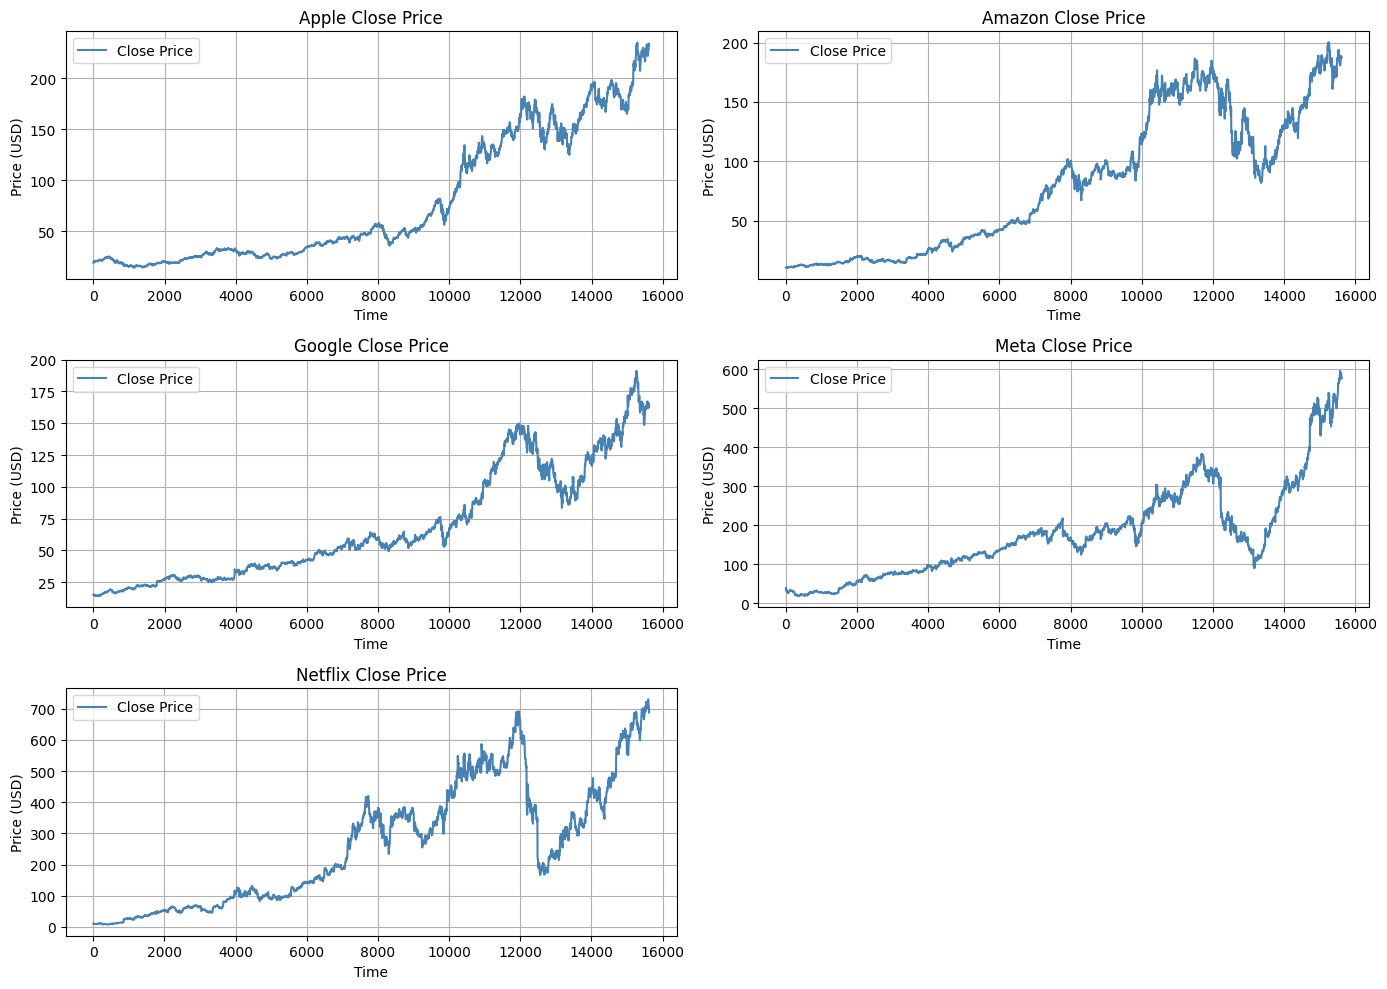

In [ ]:
import matplotlib.pyplot as plt

# Define FAANG tickers and labels
titles = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOGL': 'Google',
    'META': 'Meta',
    'NFLX': 'Netflix'
}

tickers = list(titles.keys())
df_cleaned = pd.read_csv("faang_cleaned.csv")

# Set up subplots: 3 rows x 2 columns (last plot will be empty)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Plot each stock in a subplot
for i, ticker in enumerate(tickers):
    ax = axes[i]
    df_temp = df_cleaned[df_cleaned['ticker'] == ticker].copy()
    ax.plot(df_temp['close'], label='Close Price', color='steelblue')
    ax.set_title(f"{titles[ticker]} Close Price")
    ax.set_xlabel("Time")
    ax.set_ylabel("Price (USD)")
    ax.legend()
    ax.grid(True)

# Hide unused subplot (6th spot)
if len(tickers) < len(axes):
    for j in range(len(tickers), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



📈 Processing AAPL...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
✅ LSTM → RMSE: 1.0948, MAE: 1.0626


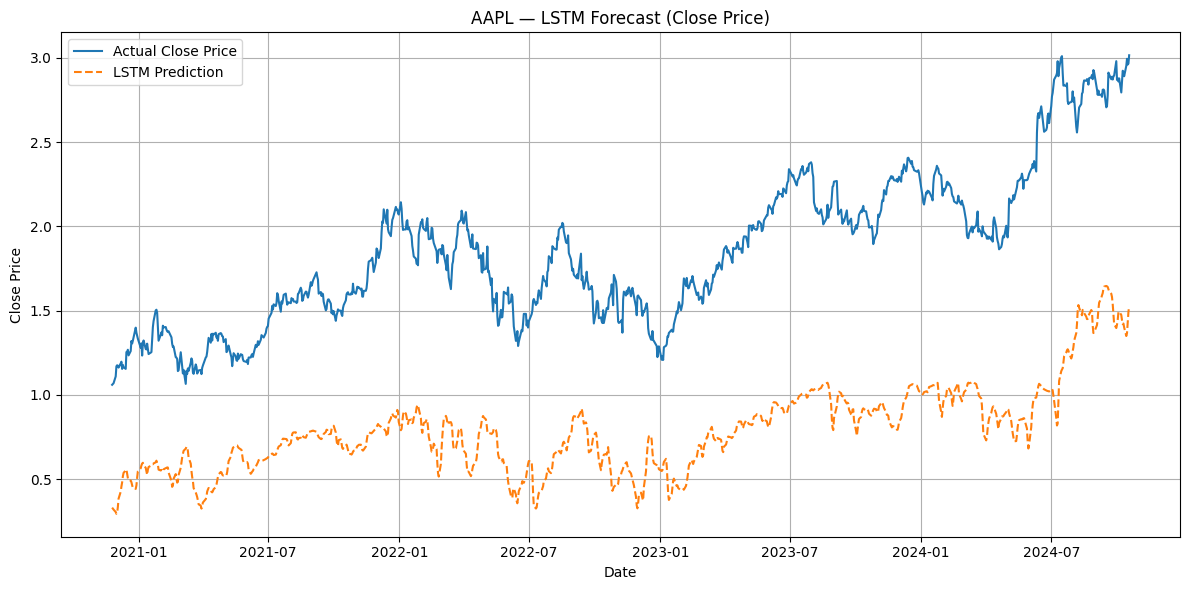


📈 Processing AMZN...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
✅ LSTM → RMSE: 0.6628, MAE: 0.5774


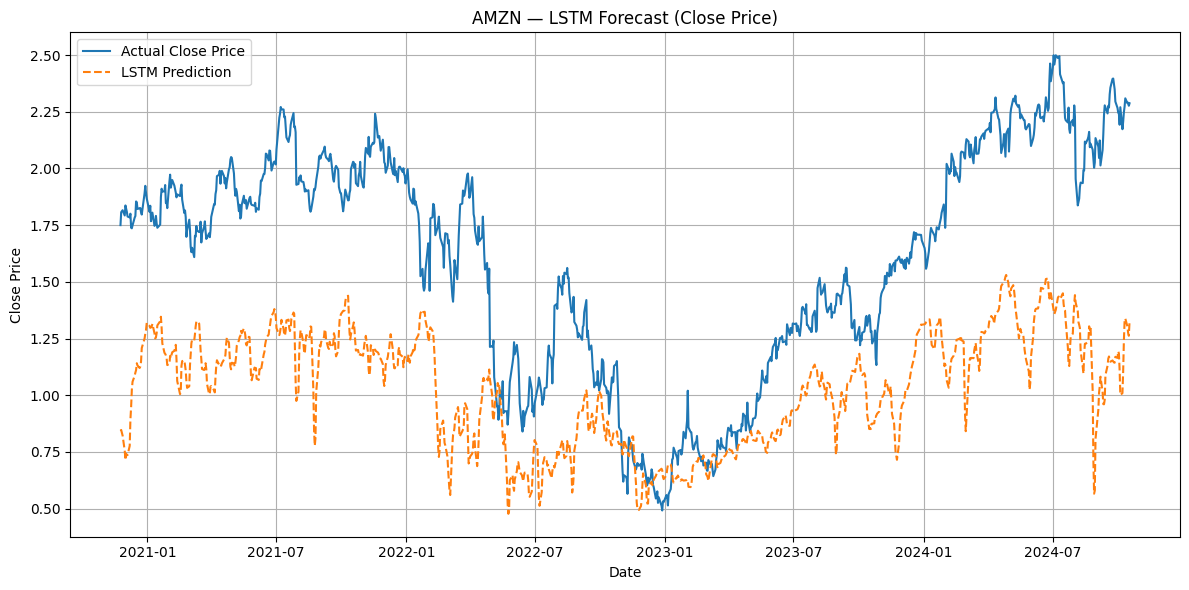


📈 Processing GOOGL...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
✅ LSTM → RMSE: 0.7860, MAE: 0.6924


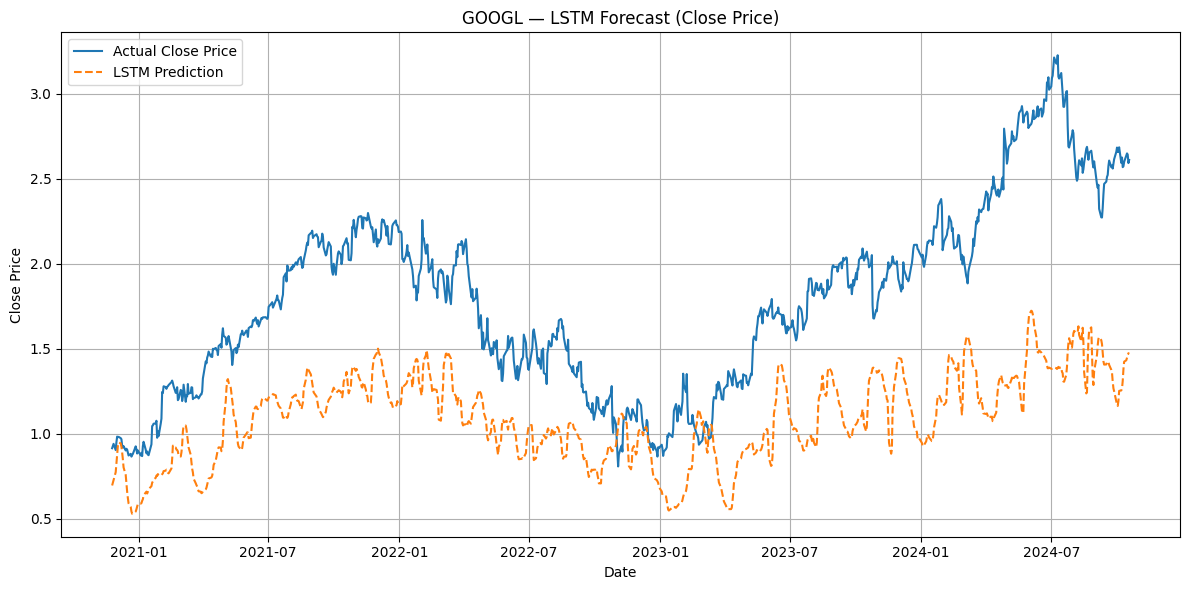


📈 Processing META...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
✅ LSTM → RMSE: 0.7390, MAE: 0.5228


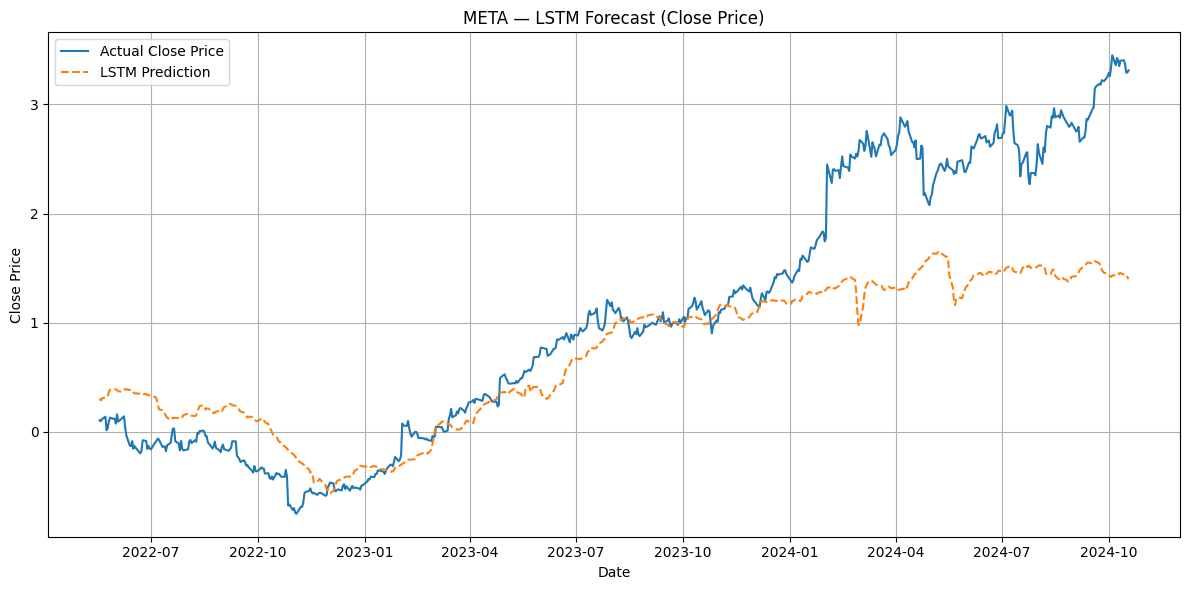


📈 Processing NFLX...
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
✅ LSTM → RMSE: 0.6772, MAE: 0.5449


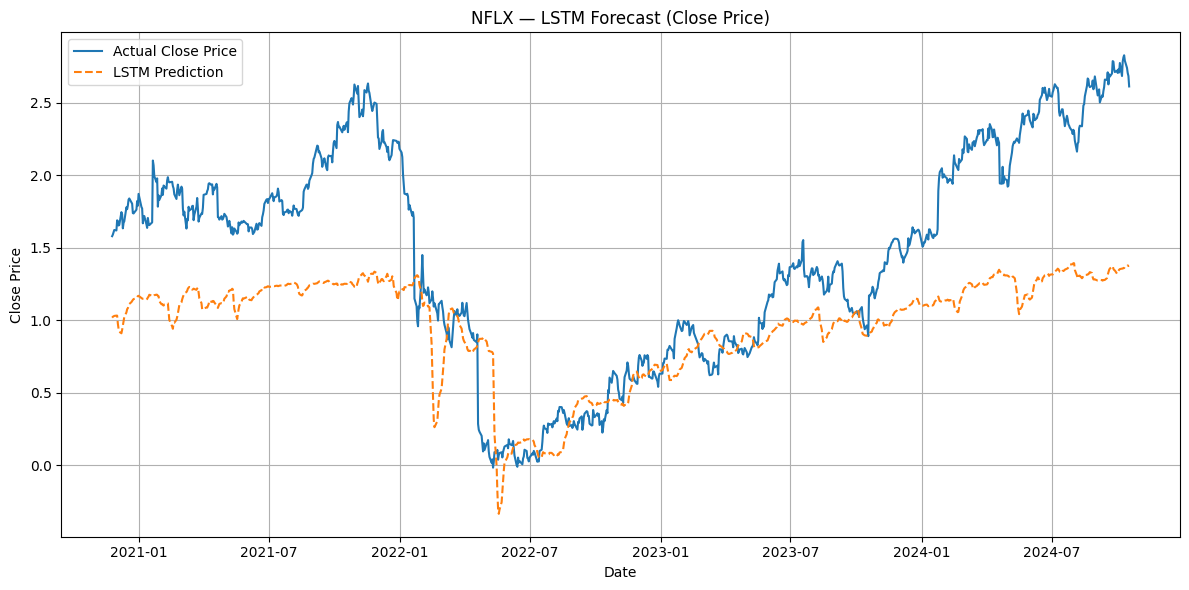


📊 Summary of LSTM (Close Price) Performance:
  Ticker  LSTM_RMSE  LSTM_MAE
0   AAPL   1.094846  1.062644
1   AMZN   0.662807  0.577426
2  GOOGL   0.786027  0.692430
3   META   0.738954  0.522797
4   NFLX   0.677209  0.544886


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("faang_cleaned.csv")
df['date'] = pd.to_datetime(df['date'])
df.sort_values(['ticker', 'date'], inplace=True)

# FAANG tickers
faang = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']

# Feature set
final_features = ['close', 'volume', 'moving_avg_10', 'rolling_std_5']
sequence_length = 60
future_period = 15

results = []

for ticker in faang:
    print(f"\n📈 Processing {ticker}...")

    df_stock = df[df['ticker'] == ticker].copy()
    df_stock.reset_index(drop=True, inplace=True)
    df_stock['moving_avg_10'] = df_stock['close'].rolling(10).mean()
    df_stock['rolling_std_5'] = df_stock['close'].rolling(5).std()
    df_stock.dropna(inplace=True)

    if len(df_stock) < sequence_length + future_period + 1:
        print(f"⚠️ Skipping {ticker} due to insufficient data.")
        continue

    scaler = StandardScaler()
    df_stock[final_features] = scaler.fit_transform(df_stock[final_features])

    def create_sequences(X_df, y_series, seq_len, horizon):
        X, y = [], []
        for i in range(len(X_df) - seq_len - horizon):
            X.append(X_df.iloc[i:i+seq_len].values)
            y.append(y_series.iloc[i+seq_len+horizon])
        return np.array(X), np.array(y)

    X_df = df_stock[final_features]
    y_series = df_stock['close']
    X, y = create_sequences(X_df, y_series, sequence_length, future_period)

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

    y_pred_lstm = model.predict(X_test)
    rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm.ravel()))
    mae_lstm = mean_absolute_error(y_test, y_pred_lstm.ravel())

    print(f"✅ LSTM → RMSE: {rmse_lstm:.4f}, MAE: {mae_lstm:.4f}")

    results.append({
        'Ticker': ticker,
        'LSTM_RMSE': rmse_lstm,
        'LSTM_MAE': mae_lstm
    })

    # Plot predictions
    plot_range = len(y_test)
    dates = df_stock['date'].iloc[-plot_range:]
    plt.figure(figsize=(12, 6))
    plt.plot(dates, y_test, label='Actual Close Price')
    plt.plot(dates, y_pred_lstm.ravel(), label='LSTM Prediction', linestyle='--')
    plt.title(f'{ticker} — LSTM Forecast (Close Price)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Save results for comparison
results_df = pd.DataFrame(results)
print("\n📊 Summary of LSTM (Close Price) Performance:")
print(results_df)
results_df.to_csv("individual_lstm_results.csv", index=False)

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("faang_cleaned.csv")
df['date'] = pd.to_datetime(df['date'])

# Step 2: Find common dates across all tickers
shared_dates = set(df[df['ticker'] == 'AAPL']['date'])
for ticker in df['ticker'].unique():
    ticker_dates = set(df[df['ticker'] == ticker]['date'])
    shared_dates &= ticker_dates

# Step 3: Filter dataset to only include common dates
df_aligned = df[df['date'].isin(shared_dates)].copy()

# Step 4: Convert column names to lowercase
df_aligned.columns = df_aligned.columns.str.lower()

# Step 5: Sort by date first, then ticker
df_aligned.sort_values(['date', 'ticker'], inplace=True)

# Step 6: Save cleaned dataset
df_aligned.to_csv("faang_aligned.csv", index=False)
print("✅ Saved as faang_aligned.csv, sorted by date then ticker.")


✅ Saved as faang_aligned.csv, sorted by date then ticker.


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# === Load and prepare data ===
df = pd.read_csv("faang_aligned.csv")
df['date'] = pd.to_datetime(df['date'])
df.sort_values(['ticker', 'date'], inplace=True)

# === Add technical features ===
def add_features(stock_df):
    stock_df['daily_return'] = stock_df['close'].pct_change()
    stock_df['moving_avg_10'] = stock_df['close'].rolling(10).mean()
    stock_df['volatility_10'] = stock_df['daily_return'].rolling(10).std()
    return stock_df

df = df.groupby('ticker').apply(add_features).dropna().reset_index(drop=True)

# === One-hot encode tickers ===
le = LabelEncoder()
df['ticker_encoded'] = le.fit_transform(df['ticker'])
ticker_onehot = pd.get_dummies(df['ticker_encoded'], prefix='ticker')

# === Select and scale features ===
features = [
    'close', 'high', 'low', 'eps', 'target_price', 'quarterly_revenue_growth',
    'operating_margin', 'profit_margin', 'market_cap', 'enterprise_value',
    'free_cash_flow', 'volume', 'beta', 'beta_5y', 'daily_return',
    'moving_avg_10', 'volatility_10'
]
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[features] = scaler.fit_transform(df[features])
df_scaled = pd.concat([df_scaled, ticker_onehot], axis=1)
features += list(ticker_onehot.columns)

# === Create sequences ===
def create_sequences(data, target_col='close', time_steps=60, horizon=30):
    X, y, tickers = [], [], []
    for i in range(len(data) - time_steps - horizon):
        X.append(data.iloc[i:i+time_steps][features].values)
        y.append(data.iloc[i+time_steps+horizon][target_col])
        tickers.append(data.iloc[i+time_steps+horizon]['ticker'])
    return np.array(X), np.array(y), np.array(tickers)

X, y, ticker_seq = create_sequences(df_scaled, target_col='close', time_steps=60, horizon=30)
X, y = X.astype(np.float32), y.astype(np.float32)

# === Stratified train-test split ===
seq_df = pd.DataFrame({'seq_idx': np.arange(len(X)), 'ticker': ticker_seq})
train_idx, test_idx = train_test_split(seq_df['seq_idx'], test_size=0.2, stratify=seq_df['ticker'], random_state=42)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
ticker_train, ticker_test = ticker_seq[train_idx], ticker_seq[test_idx]

# === Manual hyperparameter search ===
search_space = [
    {'units': 32, 'dropout': 0.2, 'batch_size': 32, 'lr': 0.001},
    {'units': 64, 'dropout': 0.3, 'batch_size': 16, 'lr': 0.0005},
    {'units': 32, 'dropout': 0.1, 'batch_size': 64, 'lr': 0.001},
]

best_rmse = float('inf')
best_model, best_config, best_y_pred = None, None, None

for config in search_space:
    print(f"\n🔧 Testing config: {config}")
    model = Sequential([
        LSTM(config['units'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(config['dropout']),
        LSTM(config['units']//2),
        Dropout(config['dropout']),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=config['lr']), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=30, batch_size=config['batch_size'], validation_split=0.1, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"✅ RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_config = config
        best_model = model
        best_y_pred = y_pred

print(f"\n🏆 Best config: {best_config} with RMSE: {best_rmse:.4f}")



<ipython-input-35-98e0b2aa8514>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('ticker').apply(add_features).dropna().reset_index(drop=True)



🔧 Testing config: {'units': 32, 'dropout': 0.2, 'batch_size': 32, 'lr': 0.001}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ RMSE: 0.0423, MAE: 0.0225

🔧 Testing config: {'units': 64, 'dropout': 0.3, 'batch_size': 16, 'lr': 0.0005}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
✅ RMSE: 0.0452, MAE: 0.0205

🔧 Testing config: {'units': 32, 'dropout': 0.1, 'batch_size': 64, 'lr': 0.001}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
✅ RMSE: 0.0405, MAE: 0.0208

🏆 Best config: {'units': 32, 'dropout': 0.1, 'batch_size': 64, 'lr': 0.001} with RMSE: 0.0405


In [38]:
# === Retrain final model on full training set using best config ===
print("\n🔁 Retraining final model on full training data using best config...")

final_model = Sequential([
    LSTM(best_config['units'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(best_config['dropout']),
    LSTM(best_config['units']//2),
    Dropout(best_config['dropout']),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=best_config['lr']), loss='mean_squared_error')
final_model.fit(X_train, y_train, epochs=30, batch_size=best_config['batch_size'], verbose=1)

# === Final prediction using retrained model ===
final_preds = final_model.predict(X_test)

# Inverse transform predictions
final_preds_actual = inverse_scale(final_preds, scaler)

# Recalculate metrics
final_rmse = np.sqrt(mean_squared_error(y_test_actual, final_preds_actual))
final_mae = mean_absolute_error(y_test_actual, final_preds_actual)

print(f"\n📊 Final Retrained Model — RMSE: ${final_rmse:.2f}, MAE: ${final_mae:.2f}")



🔁 Retraining final model on full training data using best config...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0171
Epoch 2/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0045
Epoch 3/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0040
Epoch 4/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034
Epoch 5/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0033
Epoch 6/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034
Epoch 7/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034
Epoch 8/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031
Epoch 9/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0032
Epoch 10/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0031
Epoch 11/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0027
Epoch 12/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028
Epoch 13/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0029
Epoch 14/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027
Epoch 15/30
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step -

In [44]:
# === Inverse scaling for real price ===
def inverse_scale(scaled_values, scaler, feature_name='close'):
    dummy = np.zeros((len(scaled_values), scaler.n_features_in_))
    dummy[:, features.index(feature_name)] = scaled_values.flatten()
    return scaler.inverse_transform(dummy)[:, features.index(feature_name)]

y_test_actual = inverse_scale(y_test, scaler)
final_preds_actual = inverse_scale(best_y_pred, scaler)

# === Stock Recommendation ===
forecast_df = pd.DataFrame({
    'ticker': ticker_test,
    'actual_close': y_test_actual,
    'predicted_close': final_preds_actual
})
forecast_df['expected_return'] = (forecast_df['predicted_close'] - forecast_df['actual_close']) / forecast_df['actual_close']
top_stocks = forecast_df.groupby('ticker')['expected_return'].mean().sort_values(ascending=False)

print("\n📈 Recommended Stocks Based on Predicted 30-Day Return:")
print(top_stocks)
print("\nTickers in test set:", np.unique(ticker_test))


# === Recommend 1 stock with highest predicted return ===
best_stock = top_stocks.idxmax()
best_return = top_stocks.max()

print(f"\n🏆 Final Recommendation: Invest in **{best_stock}**, expected 30-day return: {best_return:.2%}")





📈 Recommended Stocks Based on Predicted 30-Day Return:
ticker
NFLX     0.148738
AMZN     0.122416
META     0.085824
GOOGL   -0.085827
AAPL    -0.188829
Name: expected_return, dtype: float64

Tickers in test set: ['AAPL' 'AMZN' 'GOOGL' 'META' 'NFLX']

🏆 Final Recommendation: Invest in **NFLX**, expected 30-day return: 14.87%


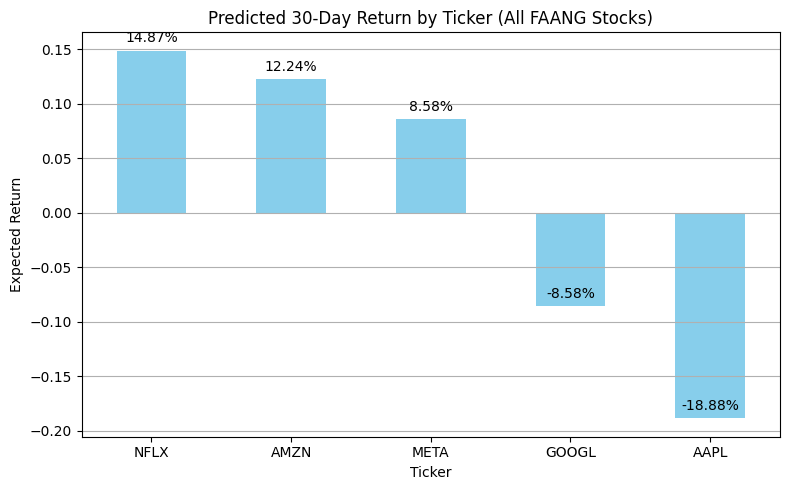

In [46]:
import matplotlib.pyplot as plt

# Compute mean expected return per ticker
avg_returns = forecast_df.groupby('ticker')['expected_return'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
bars = avg_returns.plot(kind='bar', color='skyblue')
plt.title("Predicted 30-Day Return by Ticker (All FAANG Stocks)")
plt.ylabel("Expected Return")
plt.xlabel("Ticker")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Annotate bars with percentage values
for idx, val in enumerate(avg_returns.values):
    plt.text(idx, val + 0.005, f"{val:.2%}", ha='center', va='bottom', fontsize=10)

plt.show()
